Payal Patel - Spotify Project

In [1]:
# Import Libraries #
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Connect to Spotify API #
sp = spotipy.Spotify() 
cid ="ae4935e7ba544c3fa2b85b2c94b7ba1d" 
secret = "5e8bb7b18f3d48f09db44b253d4ef029" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False

Data Collection / Wrangling 

In [3]:
# Create get_playlist_tracks function to get all tracks from a user's playlist
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [4]:
# Use get_playlist_tracks function to pull all tracks from 'pmattingly's' playlist 'Billboard #1 Hits from 2000-2019'
playlist = get_playlist_tracks('pmattingly', '06mZvzwge07R64LQNRGnFB')

In [5]:
#create list of songs in playlist
counter = 0 
song_list = []
for i in playlist:
    a = playlist[counter]
    counter = counter + 1
    #print(a.keys())
    song_list.append(a)

In [6]:
#Split song_list into 3 groups - to get all songs from playlist
song_list_1 = song_list[:75]
song_list_2 = song_list[75:150]
song_list_3 = song_list[150:]

In [7]:
# For song_list_1, get audio features and track/album/artist/release date info for each song and combine into one dataframe, df_tracks_1
ids = [] 
for i in range(len(song_list_1)): 
    ids.append(song_list_1[i]["track"]["id"]) 
features1 = sp.audio_features(ids) 
df_audio_1 = pd.DataFrame(features1)
#rename df1-3 to df_audio_1-3

df_names_1 = pd.DataFrame(columns = ['track_name', 'album_name', 'artist_name', 'release_date', 'artist_uri', 'track_uri', 'popularity'])
for i in range(len(song_list_1)):
    track_name = song_list_1[i]['track']['name']
    album_name = song_list_1[i]['track']['album']['name']
    artist_name = song_list_1[i]['track']['album']['artists'][0]['name']
    release_date = song_list_1[i]['track']['album']['release_date']
    artist_uri = (song_list_1[i]['track']['album']['artists'][0]['uri']).split(":")[2]
    track_uri = (song_list_1[i]['track']['uri']).split(":")[2]
    popularity = song_list_1[i]['track']['popularity']
    values = [track_name, album_name, artist_name, release_date, artist_uri, track_uri, popularity]
    s = pd.Series(values, index=df_names_1.columns)
    df_names_1 = df_names_1.append(s, ignore_index=True)
    
df_tracks_1 = pd.concat([df_names_1, df_audio_1], axis=1)

In [8]:
# For song_list_2, get audio features and track/album/artist/release date info for each song and combine into one dataframe, df_tracks_2
ids=[]
for i in range(len(song_list_2)): 
    ids.append(song_list_2[i]["track"]["id"]) 
features2 = sp.audio_features(ids) 
df_audio_2 = pd.DataFrame(features2)

df_names_2 = pd.DataFrame(columns = ['track_name', 'album_name', 'artist_name', 'release_date', 'artist_uri', 'track_uri', 'popularity'])
for i in range(len(song_list_2)):
    track_name = song_list_2[i]['track']['name']
    album_name = song_list_2[i]['track']['album']['name']
    artist_name = song_list_2[i]['track']['album']['artists'][0]['name']
    release_date = song_list_2[i]['track']['album']['release_date']
    artist_uri = (song_list_2[i]['track']['album']['artists'][0]['uri']).split(":")[2]
    track_uri = (song_list_2[i]['track']['uri']).split(":")[2]
    popularity = song_list_2[i]['track']['popularity']
    values = [track_name, album_name, artist_name, release_date, artist_uri, track_uri, popularity]
    s = pd.Series(values, index=df_names_2.columns)
    df_names_2 = df_names_2.append(s, ignore_index=True)
    
df_tracks_2 = pd.concat([df_names_2, df_audio_2], axis=1)

In [9]:
# For song_list_3, get audio features and track/album/artist/release date info for each song and combine into one dataframe, df_tracks_3
ids=[]
for i in range(len(song_list_3)): 
    ids.append(song_list_3[i]["track"]["id"]) 
features3 = sp.audio_features(ids) 
df_audio_3 = pd.DataFrame(features3)

df_names_3 = pd.DataFrame(columns = ['track_name', 'album_name', 'artist_name', 'release_date', 'artist_uri', 'track_uri', 'popularity'])
for i in range(len(song_list_3)):
    track_name = song_list_3[i]['track']['name']
    album_name = song_list_3[i]['track']['album']['name']    
    artist_name = song_list_3[i]['track']['album']['artists'][0]['name']
    release_date = song_list_3[i]['track']['album']['release_date']
    artist_uri = (song_list_3[i]['track']['album']['artists'][0]['uri']).split(":")[2]
    track_uri = (song_list_3[i]['track']['uri']).split(":")[2]
    popularity = song_list_3[i]['track']['popularity']
    values = [track_name, album_name, artist_name, release_date, artist_uri, track_uri, popularity]
    s = pd.Series(values, index=df_names_3.columns)
    df_names_3 = df_names_3.append(s, ignore_index=True)

df_tracks_3 = pd.concat([df_names_3, df_audio_3], axis=1)    

In [10]:
#combine 3 track datasets into 1, df_tracks
df_tracks = pd.concat([df_tracks_1,df_tracks_2,df_tracks_3], ignore_index=True)

In [11]:
#view head of df_tracks
df_tracks.head(10)

,track_name,album_name,artist_name,release_date,artist_uri,track_uri,popularity,acousticness,analysis_url,danceability,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Old Town Road (feat. Billy Ray Cyrus) - Remix,Old Town Road,Lil Nas X,2019-04-05,7jVv8c5Fj3E9VhNjxT4snq,6u7jPi22kF8CTQ3rb9DHE7,32,0.05330,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,...,0.1130,-5.560,1,0.1020,136.041,4,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639
1,Sucker,Sucker,Jonas Brothers,2019-03-01,7gOdHgIoIKoe4i9Tta6qdD,4y3OI86AEP6PQoDE6olYhO,59,0.04270,https://api.spotify.com/v1/audio-analysis/4y3O...,0.842,...,0.1060,-5.065,0,0.0588,137.958,4,https://api.spotify.com/v1/tracks/4y3OI86AEP6P...,audio_features,spotify:track:4y3OI86AEP6PQoDE6olYhO,0.952
2,Shallow,A Star Is Born Soundtrack,Lady Gaga,2018-10-05,1HY2Jd0NmPuamShAr6KMms,2VxeLyX666F8uXCJ0dZF8B,86,0.37100,https://api.spotify.com/v1/audio-analysis/2Vxe...,0.572,...,0.2310,-6.362,1,0.0308,95.799,4,https://api.spotify.com/v1/tracks/2VxeLyX666F8...,audio_features,spotify:track:2VxeLyX666F8uXCJ0dZF8B,0.323
3,7 rings,7 rings,Ariana Grande,2019-01-18,66CXWjxzNUsdJxJ2JdwvnR,14msK75pk3pA33pzPVNtBF,26,0.57800,https://api.spotify.com/v1/audio-analysis/14ms...,0.725,...,0.0884,-10.744,0,0.3230,70.142,4,https://api.spotify.com/v1/tracks/14msK75pk3pA...,audio_features,spotify:track:14msK75pk3pA33pzPVNtBF,0.319
4,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,Various Artists,2018-12-14,0LyfQWJT6nXafLPZqxe9Of,3KkXRkHbMCARz0aVfEt68P,86,0.55600,https://api.spotify.com/v1/audio-analysis/3KkX...,0.760,...,0.0703,-5.574,1,0.0466,89.911,4,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,0.913
5,Without Me,Without Me,Halsey,2018-10-04,26VFTg2z8YR0cCuwLzESi2,5p7ujcrUXASCNwRaWNHR1C,85,0.29700,https://api.spotify.com/v1/audio-analysis/5p7u...,0.752,...,0.0936,-7.050,1,0.0705,136.041,4,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533
6,SICKO MODE,ASTROWORLD,Travis Scott,2018-08-03,0Y5tJX1MQlPlqiwlOH1tJY,2xLMifQCjDGFmkHkpNLD9h,86,0.00513,https://api.spotify.com/v1/audio-analysis/2xLM...,0.834,...,0.1240,-3.714,1,0.2220,155.008,4,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,0.446
7,"thank u, next","thank u, next",Ariana Grande,2019-02-08,66CXWjxzNUsdJxJ2JdwvnR,3e9HZxeyfWwjeyPAMmWSSQ,85,0.22900,https://api.spotify.com/v1/audio-analysis/3e9H...,0.717,...,0.1010,-5.634,1,0.0658,106.966,4,https://api.spotify.com/v1/tracks/3e9HZxeyfWwj...,audio_features,spotify:track:3e9HZxeyfWwjeyPAMmWSSQ,0.412
8,Girls Like You (feat. Cardi B),Girls Like You (feat. Cardi B),Maroon 5,2018-05-30,04gDigrS5kc9YWfZHwBETP,6FRLCMO5TUHTexlWo8ym1W,79,0.56800,https://api.spotify.com/v1/audio-analysis/6FRL...,0.851,...,0.1300,-6.825,1,0.0505,124.959,4,https://api.spotify.com/v1/tracks/6FRLCMO5TUHT...,audio_features,spotify:track:6FRLCMO5TUHTexlWo8ym1W,0.448
9,In My Feelings,Scorpion,Drake,2018-06-29,3TVXtAsR1Inumwj472S9r4,2G7V7zsVDxg1yRsu7Ew9RJ,81,0.05890,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,...,0.3960,-5.833,1,0.1250,91.030,4,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.350


In [12]:
list(df_tracks.columns.values)

['track_name',
 'album_name',
 'artist_name',
 'release_date',
 'artist_uri',
 'track_uri',
 'popularity',
 'acousticness',
 'analysis_url',
 'danceability',
 'duration_ms',
 'energy',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'track_href',
 'type',
 'uri',
 'valence']

In [13]:
# view first two observations of id, uri, track_uri, and artist_uri in 
df_tracks[['id', 'uri', 'track_uri', 'artist_uri']].head(2)

,id,uri,track_uri,artist_uri
0,6u7jPi22kF8CTQ3rb9DHE7,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,6u7jPi22kF8CTQ3rb9DHE7,7jVv8c5Fj3E9VhNjxT4snq
1,4y3OI86AEP6PQoDE6olYhO,spotify:track:4y3OI86AEP6PQoDE6olYhO,4y3OI86AEP6PQoDE6olYhO,7gOdHgIoIKoe4i9Tta6qdD


In [14]:
# drop columns containing duplicate information 
df_tracks = df_tracks.drop(['uri', 'id', 'analysis_url', 'track_href'], axis=1)

In [15]:
# use release_date column to create year, month, and month_year 
#create year column
df_tracks['year'] = pd.DatetimeIndex(df_tracks['release_date']).year

#create month column
df_tracks['month'] = pd.DatetimeIndex(df_tracks['release_date']).month

#create month-year column 
df_tracks['month_year'] = pd.to_datetime(df_tracks['release_date']).dt.to_period('M')

#view year, month, and month_year of the first two observations in df_tracks
df_tracks[['year', 'month', 'month_year']].head(2)

,year,month,month_year
0,2019,4,2019-04
1,2019,3,2019-03


Exploratory Data Analysis

In [16]:
df_tracks.columns.values

array(['track_name', 'album_name', 'artist_name', 'release_date',
       'artist_uri', 'track_uri', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'type', 'valence', 'year', 'month', 'month_year'],
      dtype=object)

In [17]:
df_tracks.shape

(223, 24)

In [18]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 24 columns):
track_name          223 non-null object
album_name          223 non-null object
artist_name         223 non-null object
release_date        223 non-null object
artist_uri          223 non-null object
track_uri           223 non-null object
popularity          223 non-null object
acousticness        223 non-null float64
danceability        223 non-null float64
duration_ms         223 non-null int64
energy              223 non-null float64
instrumentalness    223 non-null float64
key                 223 non-null int64
liveness            223 non-null float64
loudness            223 non-null float64
mode                223 non-null int64
speechiness         223 non-null float64
tempo               223 non-null float64
time_signature      223 non-null int64
type                223 non-null object
valence             223 non-null float64
year                223 non-null int64
month      

In [19]:
df_tracks.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,month
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.147193,0.707870,236832.556054,0.690794,0.001140,4.923767,0.176552,-5.567762,0.618834,0.11867,118.186632,4.000000,0.609533,2008.955157,5.224215
std,0.178974,0.126272,36141.695558,0.152789,0.010279,3.773846,0.131537,1.776738,0.486766,0.10484,26.439274,0.189832,0.213742,5.246857,3.803027
min,0.000105,0.356000,157067.000000,0.264000,0.000000,0.000000,0.024300,-10.960000,0.000000,0.02320,65.997000,3.000000,0.056800,1999.000000,1.000000
25%,0.028400,0.633500,213640.000000,0.581500,0.000000,1.000000,0.088200,-6.613500,0.000000,0.04515,95.259000,4.000000,0.445000,2005.500000,1.000000
50%,0.076700,0.712000,229526.000000,0.702000,0.000000,5.000000,0.127000,-5.507000,1.000000,0.07790,119.810000,4.000000,0.633000,2009.000000,5.000000
75%,0.204000,0.795000,254087.000000,0.817000,0.000010,8.000000,0.231500,-4.387500,1.000000,0.15650,135.272000,4.000000,0.776000,2012.000000,9.000000
max,0.932000,0.975000,448573.000000,0.971000,0.125000,11.000000,0.667000,-1.190000,1.000000,0.57600,193.437000,5.000000,0.974000,2019.000000,12.000000


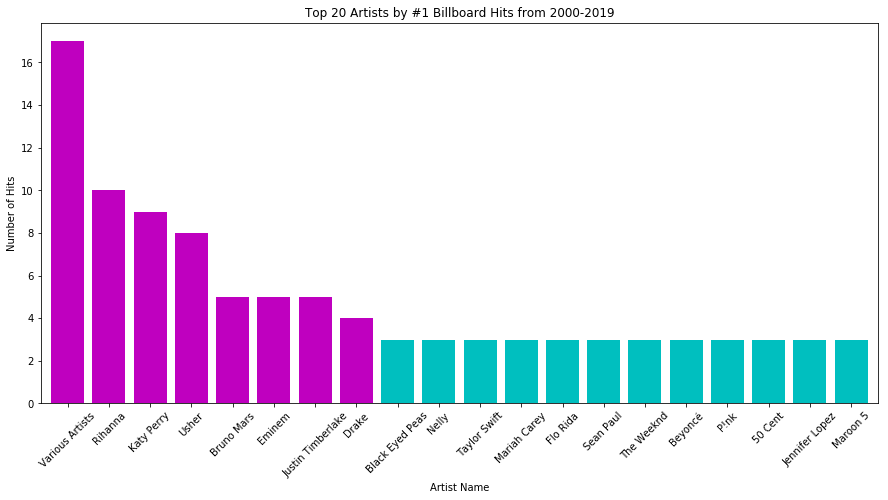

In [20]:
# View Top 20 Artists by Number of #1 Billboard Hits from 2000-2009
# magenta show artists with more than 3 hits during this time period ; teal shows artists with 3 hits during this time 
top_20_artists = pd.DataFrame(df_tracks['artist_name'].value_counts()[:20])
#sns.countplot(x="artist_name", data=top_20_artists)
rcParams['figure.figsize'] = 15, 7

top_20_artists.plot(kind='bar', width = .8, color=[np.where(top_20_artists["artist_name"]>3, 'm', 'c')], legend=None)

plt.title('Top 20 Artists by #1 Billboard Hits from 2000-2019')
plt.xlabel('Artist Name')
plt.xticks(rotation = 45)
plt.ylabel('Number of Hits')
plt.show()

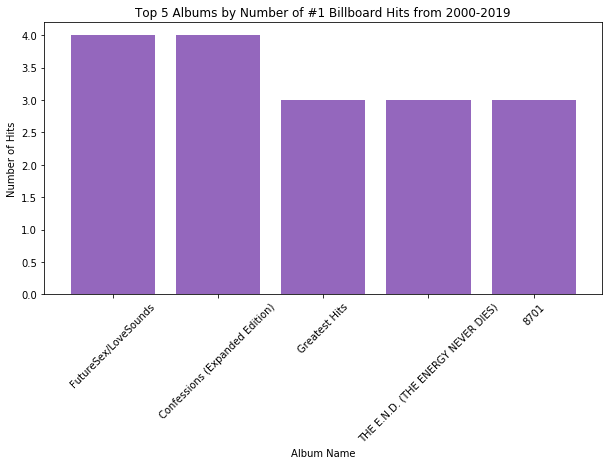

In [21]:
# Top 5 Albums by Number of #1 Billboard Hits from 2000 - 2019 
top_albums = pd.DataFrame(df_tracks['album_name'].value_counts()[:5])
rcParams['figure.figsize'] = 10, 5
top_albums.plot(kind='bar', width = .8, color='tab:purple', legend = None)
plt.title('Top 5 Albums by Number of #1 Billboard Hits from 2000-2019')
plt.xlabel('Album Name')
plt.xticks(rotation = 45)
plt.ylabel('Number of Hits')
plt.show()

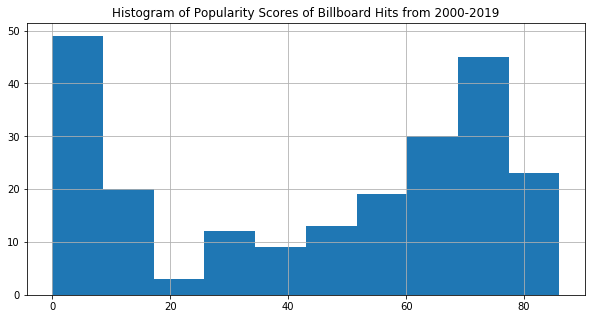

In [22]:
#histogram of popularity scores of #1 Billboard Hits from 2000 to 2019
#something to think about in terms of next steps -- some songs may have a higher popularity score if they've come out more recently
#possibly standardize the popularity score variable (with time)
df_tracks["popularity"] = pd.to_numeric(df_tracks["popularity"])
ax = df_tracks['popularity'].hist(bins=10)
ax.set_title('Histogram of Popularity Scores of Billboard Hits from 2000-2019')
plt.show()

Text(0, 0.5, 'Number of Hits')

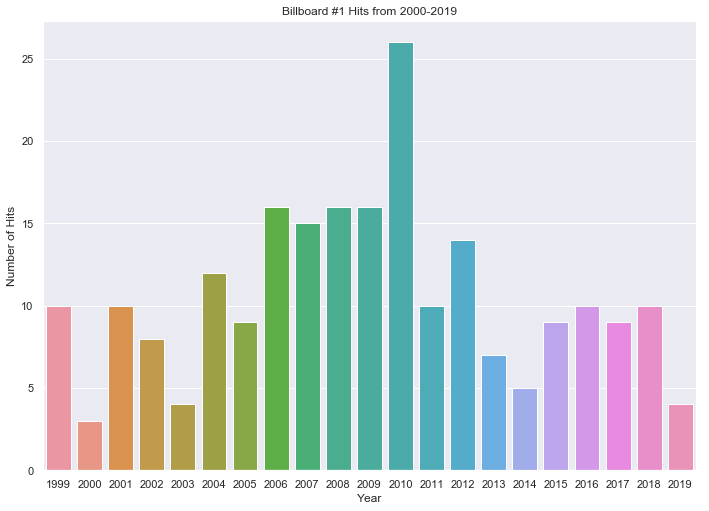

In [23]:
# Number of Billboard #1 Hits from 2000-2019 by year
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='year', data=df_tracks)
plt.title('Billboard #1 Hits from 2000-2019')
plt.xlabel('Year')
plt.ylabel('Number of Hits')

Create subset of df_tracks for clustering 

In [26]:
df_tracks_subset = df_tracks[['track_uri','popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
                              'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
                             'time_signature']]

In [27]:
df_tracks_subset.loc[:, df_tracks_subset.columns != 'track_uri'].head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,32,0.0533,0.878,157067,0.619,0.0,6,0.1130,-5.560,1,0.1020,136.041,4
1,59,0.0427,0.842,181040,0.734,0.0,1,0.1060,-5.065,0,0.0588,137.958,4
2,86,0.3710,0.572,215733,0.385,0.0,7,0.2310,-6.362,1,0.0308,95.799,4
3,26,0.5780,0.725,178640,0.321,0.0,1,0.0884,-10.744,0,0.3230,70.142,4
4,86,0.5560,0.760,158040,0.479,0.0,2,0.0703,-5.574,1,0.0466,89.911,4


K-Means Clustering : use K-Means clustering to cluster songs in playlist

In [28]:
#standardize data in df_tracks
# * note: only using numeric / continuous variables as we are using k-means algorithm & need to standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_tracks_subset.loc[:, df_tracks_subset.columns != 'track_uri'])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

C:\Users\19197\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\19197\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,223.000000
mean,-9.658442e-17,-6.223223e-18,-4.595228e-16,1.274516e-16,-8.105126e-16,-1.543359e-17,8.463584e-17,-1.274516e-16,8.817063e-16,4.182006e-17,5.538669e-17,8.966420e-16,0.000000
std,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250e+00,1.002250
min,-1.487478e+00,-8.236849e-01,-2.792866e+00,-2.211988e+00,-2.799645e+00,-1.111703e-01,-1.307643e+00,-1.160092e+00,-3.041737e+00,-1.274178e+00,-9.126768e-01,-1.978384e+00,-5.279678
25%,-1.104097e+00,-6.652340e-01,-5.902900e-01,-6.431556e-01,-7.169356e-01,-1.111703e-01,-1.042065e+00,-6.732039e-01,-5.898959e-01,-1.274178e+00,-7.028385e-01,-8.691318e-01,0.000000
50%,3.127440e-01,-3.947558e-01,3.278104e-02,-2.026190e-01,7.350998e-02,-1.111703e-01,2.024584e-02,-3.775663e-01,3.427576e-02,7.848197e-01,-3.897539e-01,6.153799e-02,0.000000
75%,9.294866e-01,3.181193e-01,6.915695e-01,4.784851e-01,8.278771e-01,-1.102289e-01,8.169793e-01,4.186741e-01,6.657806e-01,7.848197e-01,3.616489e-01,6.476655e-01,0.000000
max,1.379542e+00,4.394892e+00,2.120267e+00,5.871800e+00,1.838073e+00,1.207659e+01,1.613713e+00,3.736978e+00,2.469476e+00,7.848197e-01,4.371999e+00,2.852562e+00,5.279678


Text(0, 0.5, 'Inertia')

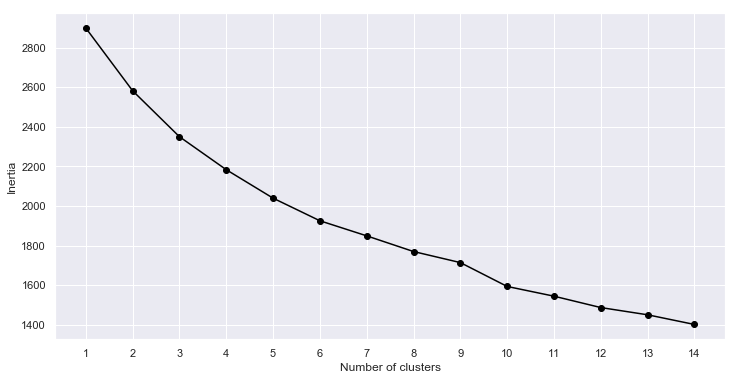

In [29]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plot them (use this elbow method to determine the optimal number of clusters)
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', color='black')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 15))
plt.ylabel('Inertia')

In [30]:
# k means using 5 clusters (based off of elbow method results above) and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [31]:
# get counts of number of observations/songs in each cluster
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    87
1    63
2    36
0    35
3     2
Name: cluster, dtype: int64

In [32]:
#combine track info variables (track_uri, track_name, album_name, and artist_name) with frame (predicted cluster value of each observation)
df_final = pd.concat([df_tracks[['track_uri', 'track_name', 'album_name', 'artist_name']], frame], axis=1)

In [33]:
#view combined dataset created above
df_final.head()

,track_uri,track_name,album_name,artist_name,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,6u7jPi22kF8CTQ3rb9DHE7,Old Town Road (feat. Billy Ray Cyrus) - Remix,Old Town Road,Lil Nas X,-0.420680,-0.525795,1.350358,-2.211988,-0.470946,-0.11117,0.285824,-0.484240,0.004379,0.784820,-0.159362,0.676816,0.0,4
1,4y3OI86AEP6PQoDE6olYhO,Sucker,Sucker,Jonas Brothers,0.479431,-0.585155,1.064618,-1.547190,0.283421,-0.11117,-1.042065,-0.537576,0.283606,-1.274178,-0.572347,0.749485,0.0,4
2,2VxeLyX666F8uXCJ0dZF8B,Shallow,A Star Is Born Soundtrack,Lady Gaga,1.379542,1.253313,-1.078428,-0.585114,-2.005919,-0.11117,0.551402,0.414864,-0.448026,0.784820,-0.840022,-0.848662,0.0,2
3,14msK75pk3pA33pzPVNtBF,7 rings,7 rings,Ariana Grande,-0.620704,2.412505,0.135965,-1.613745,-2.425741,-0.11117,-1.042065,-0.671680,-2.919892,-1.274178,1.953361,-1.821257,0.0,2
4,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,Various Artists,1.379542,2.289306,0.413767,-2.185006,-1.389306,-0.11117,-0.776488,-0.809593,-0.003519,0.784820,-0.688977,-1.071862,0.0,2


In [34]:
# randomly select songs from each cluster and store in track_list
#seed wasn't set so the playlist created will show a different set of songs
random_tracks = df_final.groupby('cluster').apply(lambda x: x.sample(1)).reset_index(drop=True)
track_list = random_tracks[['track_uri', 'track_name', 'album_name', 'artist_name', 'cluster']]
track_list

,track_uri,track_name,album_name,artist_name,cluster
0,4JtVOeyOJyPLg72MbGoNn8,Hips Don't Lie,NOW 10th Anniversary,Various Artists,0
1,6WAhLCL1XchQzYjl15rnFp,Say My Name,Say My Name,Destiny's Child,1
2,3U4isOIWM3VvDubwSI3y7a,All of Me,Love In The Future (Expanded Edition),John Legend,2
3,0UdqZQEbRWTkNXlh5kl2L8,All For You,All For You,Janet Jackson,3
4,5AtFypwxB2ShXSxNj12dEd,Say It Right,Loose,Nelly Furtado,4


Hierarchical Clustering 

In [35]:
#normalize data to be used in hierarchical clustering
data_scaled_h = normalize(df_tracks_subset.loc[:, df_tracks_subset.columns != 'track_uri'])
data_scaled_h = pd.DataFrame(data_scaled_h, columns=df_tracks_subset.loc[:, df_tracks_subset.columns != 'track_uri'].columns)
data_scaled_h.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,0.000204,3.393455e-07,0.000006,1.0,0.000004,0.0,0.000038,7.194379e-07,-0.000035,0.000006,6.494041e-07,0.000866,0.000025
1,0.000326,2.358594e-07,0.000005,1.0,0.000004,0.0,0.000006,5.855058e-07,-0.000028,0.000000,3.247900e-07,0.000762,0.000022
2,0.000399,1.719718e-06,0.000003,1.0,0.000002,0.0,0.000032,1.070768e-06,-0.000029,0.000005,1.427690e-07,0.000444,0.000019
3,0.000146,3.235557e-06,0.000004,1.0,0.000002,0.0,0.000006,4.948499e-07,-0.000060,0.000000,1.808106e-06,0.000393,0.000022
4,0.000544,3.518096e-06,0.000005,1.0,0.000003,0.0,0.000013,4.448240e-07,-0.000035,0.000006,2.948620e-07,0.000569,0.000025


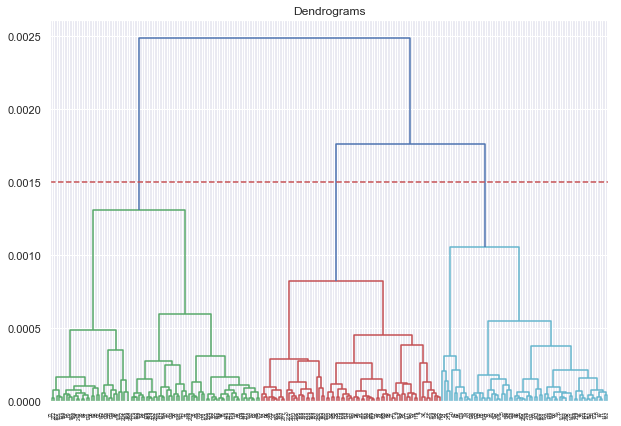

In [36]:
#plot dendrogram -- resulting dendrogram shows 3 optimal clusters , using ward's method 
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled_h, method='ward'))
plt.axhline(y=.0015, color='r', linestyle='--')

In [37]:
#agglomerative hierarchical clustering technique with 3 clusters 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled_h)

array([1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1,
       0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2,
       0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [38]:
data_scaled_h.columns.values

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'time_signature'], dtype=object)

In [39]:
a =cluster.fit_predict(data_scaled_h)

In [40]:
a = pd.Series(a)

In [41]:
# combine track info (track_uri, track_name, album_name and artist_name) with predicted cluster for each observation/song
df_final_h = pd.concat([df_tracks[['track_uri', 'track_name', 'album_name', 'artist_name']], a], axis=1)

In [42]:
# view combined dataset created above 
df_final_h.head()

,track_uri,track_name,album_name,artist_name,0
0,6u7jPi22kF8CTQ3rb9DHE7,Old Town Road (feat. Billy Ray Cyrus) - Remix,Old Town Road,Lil Nas X,1
1,4y3OI86AEP6PQoDE6olYhO,Sucker,Sucker,Jonas Brothers,1
2,2VxeLyX666F8uXCJ0dZF8B,Shallow,A Star Is Born Soundtrack,Lady Gaga,2
3,14msK75pk3pA33pzPVNtBF,7 rings,7 rings,Ariana Grande,2
4,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,Various Artists,2


In [43]:
#select random tracks for playlist from each cluster created using hierarchical agglomerative clustering technique 
#seed wasn't set so the playlist created will show a different set of songs
random_tracks_h = df_final_h.groupby(0).apply(lambda x: x.sample(1)).reset_index(drop=True)
track_list_h = random_tracks_h[['track_uri', 'track_name', 'album_name', 'artist_name', 0]]
track_list_h

,track_uri,track_name,album_name,artist_name,0
0,0kSgECIEu3ARlKI5M6Z30E,Harlem Shake,Jeffree's Volume 3,Various Artists,0
1,08Bfk5Y2S5fCxgxk371Eel,S&M,Loud,Rihanna,1
2,7I6DceMT3utDOHjcYCbrr4,Don't Matter,Konvicted,Akon,2


Resources:
- https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
- https://medium.com/@RareLoot/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330 
- https://www.kaggle.com/geomack/how-to-grab-data-using-the-spotipy-library 
- https://stackoverflow.com/questions/39086287/spotipy-how-to-read-more-than-100-tracks-from-a-playlist 
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/ 
